# TASK 6 Prediction using Decision Tree Algorithm

## **for this task there are 6 sections:
## 1)data importing with pandas
## 2) checking for outliers
## 3) making dependent and independent values
## 4) creating and fitting Decision tree Classifier model
## 5) evaluation of the test
## 6) tree building
### **the following are the neccessary packages for the task

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

## 1)data importing with pandas


In [ ]:
data3=pd.read_csv('Iris.csv')
data3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2) checking for outliers


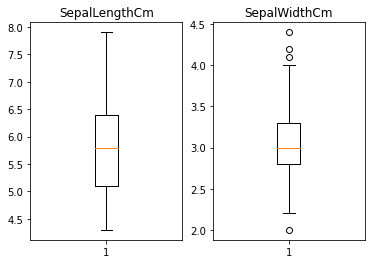

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['SepalLengthCm'])
axcls[1].boxplot(data3['SepalWidthCm'])
axcls[0].set_title('SepalLengthCm')
axcls[1].set_title('SepalWidthCm')
plt.show()

***outliers exists***

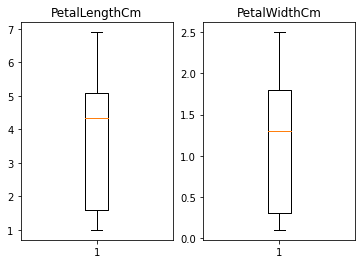

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['PetalLengthCm'])
axcls[1].boxplot(data3['PetalWidthCm'])
axcls[0].set_title('PetalLengthCm')
axcls[1].set_title('PetalWidthCm')
plt.show()

***removing outliers***

In [ ]:
q1cls=data3['SepalWidthCm'].quantile(0.25)
q3cls=data3['SepalWidthCm'].quantile(0.75)
iqrcls=q3cls-q1cls
mincls=q1cls-(1*iqrcls)
maxcls=q3cls+(1*iqrcls)
print(mincls,maxcls)

2.3 3.8


In [ ]:
data3=data3[data3['SepalWidthCm']>=mincls]
data3=data3[data3['SepalWidthCm']<=maxcls]
#data3

***data after removing outliers***

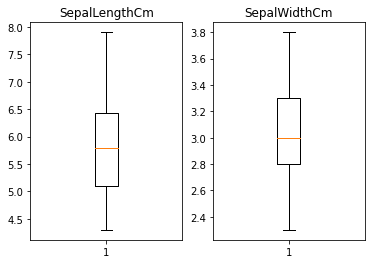

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['SepalLengthCm'])
axcls[1].boxplot(data3['SepalWidthCm'])
axcls[0].set_title('SepalLengthCm')
axcls[1].set_title('SepalWidthCm')
plt.show()

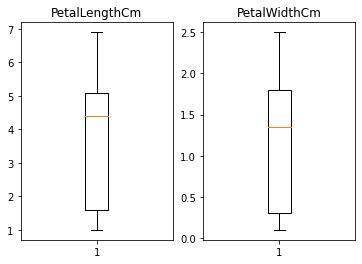

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['PetalLengthCm'])
axcls[1].boxplot(data3['PetalWidthCm'])
axcls[0].set_title('PetalLengthCm')
axcls[1].set_title('PetalWidthCm')
plt.show()

## 3) spliting the data into train and test


In [ ]:
clsxtrain,clsxtest,clsytrain,clsytest=train_test_split(data3.iloc[:,1:-1].values,
                                                      data3.iloc[:,-1:],test_size=0.3,random_state=1)

## 4) creating and fitting Decision tree Classifier model


In [ ]:
cls1=DecisionTreeClassifier().fit(clsxtrain,clsytrain)
cls1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 5) evaluation of the test


In [ ]:
predcls=cls1.predict(clsxtest)

In [ ]:
acc1 = round(metrics.accuracy_score(clsytest, predcls),3)
print('decision tree pred : ',acc1)

decision tree pred :  1.0


***result gave 100% accuracy***

## 6) tree building

### text tree

In [ ]:
sda=tree.export_text(cls1,feature_names=['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'	])
print(sda)

|--- PetalWidthCm <= 0.80
|   |--- class: Iris-setosa
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.05
|   |   |   |--- SepalLengthCm <= 5.00
|   |   |   |   |--- PetalWidthCm <= 1.35
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- PetalWidthCm >  1.35
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalLengthCm >  5.00
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.05
|   |   |   |--- SepalLengthCm <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalLengthCm >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



### plot tree

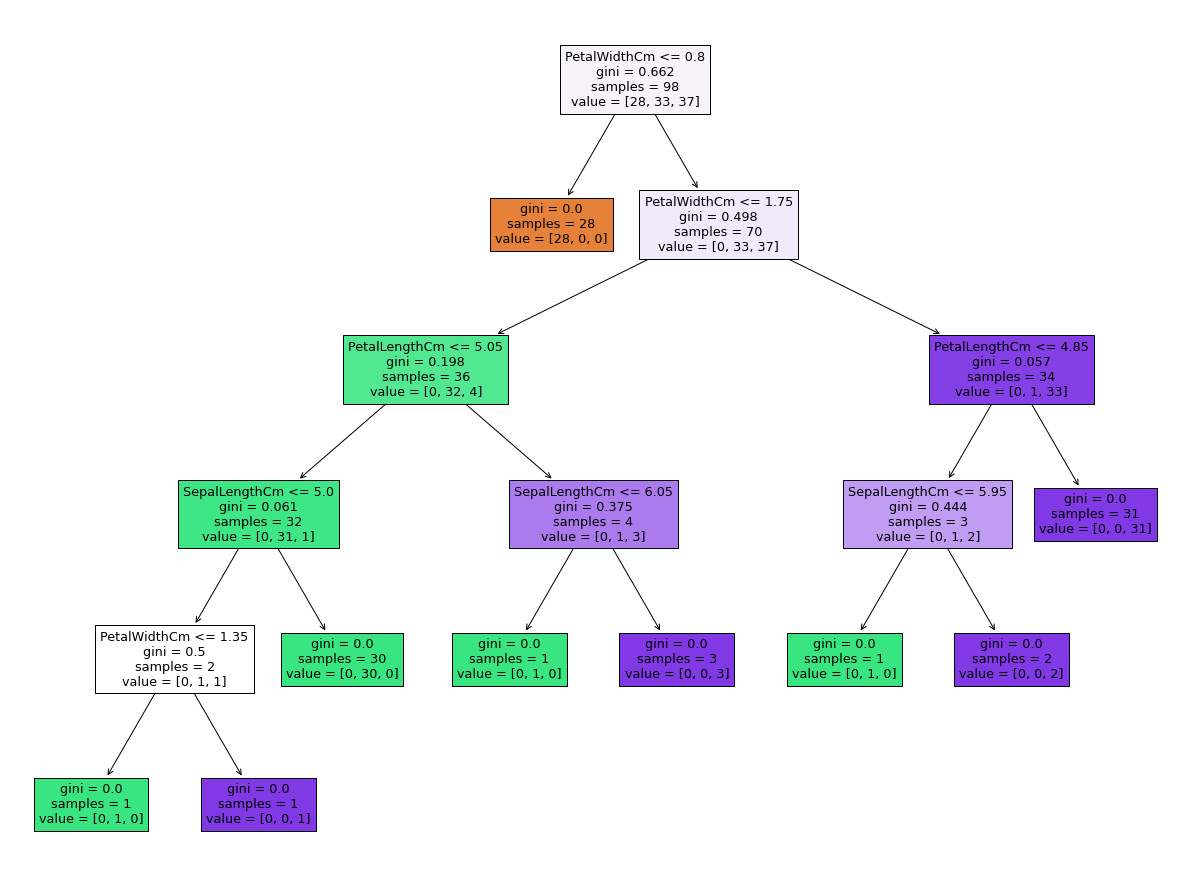

In [ ]:
figcls = plt.figure(figsize=(21,16))
tree.plot_tree(cls1,feature_names=['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'	],filled=True)
plt.show()